## Question 1 : What is Elastic Net Regression and how does it differ from other regression techniques?
---

## Answer :

### Elastic Net Regression is a linear regression model that combines the penalties of two different regularization methods, L1 and L2.

### L1 regularization, also known as Lasso regularization, adds a penalty term to the objective function that encourages sparse solutions by forcing some of the coefficients to be exactly zero. This makes it useful for feature selection and can help avoid overfitting by reducing the number of variables in the model.

### L2 regularization, also known as Ridge regularization, adds a penalty term that shrinks the coefficients towards zero, but does not force them to be exactly zero. This can help reduce the effect of multicollinearity in the data and can also help prevent overfitting.

### Elastic Net Regression combines these two methods by adding a penalty term that is a linear combination of the L1 and L2 penalties. The amount of regularization applied by each penalty term is controlled by a tuning parameter that can be adjusted to optimize performance.

### Compared to other regression techniques, Elastic Net Regression has the advantage of being able to handle high-dimensional data with correlated predictors. It can also perform both feature selection and coefficient shrinkage simultaneously. However, it may not perform as well as other methods in certain situations, such as when the number of predictors is much larger than the sample size or when there are strong nonlinear relationships between the predictors and the response variable.

### Equation for Ridge Regression (L2 Penalty):
$
\mathcal{L}_{\text{ridge}}(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T\mathbf{x}_i)^2 + \lambda 2\sum_{j=1}^{p} w_j^2
$

### Equation for Lasso Regression (L1 Penalty) :
$
\mathcal{L}_{\text{lasso}}(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T\mathbf{x}_i)^2 + \lambda 1\sum_{j=1}^{p} |w_j|
$

### Equation for Elastic Net Regression :
$
\mathcal{L}_{\text{elastic net}}(\mathbf{w}) = \sum{i=1}^{n} (y_i - \mathbf{w}^T\mathbf{x}i)^2 + \lambda 1\sum{j=1}^{p} |\omega_j| + \lambda 2\sum_{j=1}^{p} w_j^2
$

where :
1. $\mathbf{w}$ represents the vector of regression coefficients
2. $\mathbf{x}_i$ represents the feature vector for the $i$th data point, $y_i$ represents the target value for the $i$th data point.
3. $p$ is the number of features
4. $\lambda 1$, $\lambda 2$ are tuning parameters controlling the strength of the regularization penalty
5. $|\cdot|$ denotes the absolute value function.


## Question 2 : How do you choose the optimal values of the regularization parameters for Elastic Net Regression?
---

## Answer :

### Choosing the optimal values of the regularization parameters for Elastic Net Regression typically involves a process called hyperparameter tuning. The goal is to find the values of $\lambda_1$ and $\lambda_2$ that result in the best model performance on a held-out validation set.

### Here are the steps for hyperparameter tuning in Elastic Net Regression:

1. Split the data into training and validation sets.

2. Define a range of values for $\lambda_1$ and $\lambda_2$ to try. This range can be chosen based on prior knowledge, or through experimentation. For example, you can try a grid of values or use a randomized search approach.

3. Train the Elastic Net model on the training set for each combination of $\lambda_1$ and $\lambda_2$ in the range of values defined in step 2.

4. Evaluate the model performance on the validation set for each combination of $\lambda_1$ and $\lambda_2$.

5. Select the values of $\lambda_1$ and $\lambda_2$ that result in the best model performance on the validation set.

6. There are several metrics you can use to evaluate model performance, such as mean squared error (MSE), mean absolute error (MAE), or R-squared. You can choose the metric that is most appropriate for your problem.

### It's important to note that hyperparameter tuning can be computationally expensive, especially if you have a large dataset or a large range of hyperparameter values to try. In some cases, it may be necessary to use techniques like cross-validation or Bayesian optimization to make the tuning process more efficient.

### Below is python code for Hyperparameter tuning of Elastic Net :

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, noise=25, random_state=42)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of alpha and l1_ratio values to try
alphas = [0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.9]

# Create ElasticNetCV model
model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5)

# Train model on training set
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Evaluate model on test set
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

# Print Evaluated Results
print("Best alpha: ", model.alpha_)
print("Best l1_ratio: ", model.l1_ratio_)
print(f"Testing MAE: {mae:.2f}")
print(f"Testing MSE: {mse:.2f}")
print(f"Testing RMSE : {mse**0.5:.2f}")
print(f"Testing R2 : {r2:.4f}")

Best alpha:  0.1
Best l1_ratio:  0.9
Testing MAE: 19.41
Testing MSE: 594.31
Testing RMSE : 24.38
Testing R2 : 0.9649


## Question 3 : What are the advantages and disadvantages of Elastic Net Regression?
---

## Answer :

### Here are some advantages and disadvantages of Elastic Net Regression:

### Advantages:

* Elastic Net Regression can handle high-dimensional datasets with many features, as it can perform feature selection and shrinkage simultaneously.
* It can handle correlated features well, as it uses a combination of L1 and L2 penalties to balance between sparse and dense solutions.
* It allows for a trade-off between bias and variance, as the regularization parameters can be tuned to adjust the degree of shrinkage.
* It can be used for both regression and classification problems.

### Disadvantages:

* Elastic Net Regression can be computationally expensive, especially when dealing with a large number of features or a large dataset.
The optimal values for the regularization parameters must be determined through hyperparameter tuning, which can also be computationally expensive.
* Elastic Net Regression assumes that the relationship between the features and the target variable is linear. If the relationship is nonlinear, other methods such as decision trees or neural networks may be more appropriate.
* It may not perform well if the dataset has a low number of samples compared to the number of features, as this can result in an overfitting of the model.

### Overall, Elastic Net Regression can be a useful tool for handling high-dimensional datasets with correlated features, but it may not be the best option for all problems. It's important to carefully consider the advantages and disadvantages before deciding whether to use Elastic Net Regression for a particular task.

## Question 4 : What are some common use cases for Elastic Net Regression?
---

## Answer :

### Here are some common use cases for Elastic Net Regression:

1. Gene expression analysis: Elastic Net Regression can be used to analyze gene expression data, where the number of features (genes) is typically much larger than the number of samples. By identifying the most important genes that are associated with a particular disease or condition, researchers can gain insights into the underlying biological mechanisms.

2. Financial forecasting: Elastic Net Regression can be used to predict financial variables such as stock prices, exchange rates, and commodity prices. By incorporating multiple features such as historical prices, economic indicators, and news sentiment, the model can capture complex relationships and improve the accuracy of the predictions.

3. Marketing analytics: Elastic Net Regression can be used to analyze customer behavior and preferences, and to predict the effectiveness of marketing campaigns. By identifying the most important factors that influence customer decisions, marketers can develop targeted strategies to improve customer engagement and loyalty.

4. Image processing: Elastic Net Regression can be used for feature extraction and image denoising. By identifying the most important features that contribute to image classification or reconstruction, the model can improve the accuracy and quality of the results.

5. Environmental science: Elastic Net Regression can be used to analyze environmental data such as air and water quality, climate variables, and soil properties. By identifying the most important variables that are associated with environmental degradation or pollution, researchers can develop strategies to mitigate the impacts and protect human health.

### Overall, Elastic Net Regression can be used in a wide range of applications where there are high-dimensional datasets with correlated features. By incorporating both L1 and L2 penalties, Elastic Net Regression can balance between sparse and dense solutions, and provide a powerful tool for feature selection and regularization.

## Question 5 : How do you interpret the coefficients in Elastic Net Regression?
---

## Answer :

### Interpreting the coefficients in Elastic Net Regression can be slightly more complex than in linear regression due to the presence of the regularization terms. Here are some general guidelines:

1. Sign of the coefficient: The sign of the coefficient indicates whether the feature has a positive or negative effect on the target variable. For example, if the coefficient for a feature is positive, then an increase in the value of that feature will lead to an increase in the target variable.

2. Magnitude of the coefficient: The magnitude of the coefficient indicates the strength of the relationship between the feature and the target variable. A larger magnitude indicates a stronger relationship. However, it's important to keep in mind that the magnitude of the coefficient can be influenced by the scale of the feature and the target variable.

3. Regularization term: The regularization terms in Elastic Net Regression can shrink the magnitude of the coefficients towards zero, which can result in sparser solutions. Therefore, it's important to consider the regularization parameters when interpreting the coefficients. A larger value of the regularization parameter can result in more coefficients being shrunk towards zero, which can lead to a simpler model with fewer features.

4. Coefficient stability: The stability of the coefficients across different datasets or subsets of the same dataset can provide information about the robustness of the model. If the coefficients are consistent across different datasets or subsets, then the model is more likely to generalize well to new data.

### In summary, interpreting the coefficients in Elastic Net Regression requires considering the sign, magnitude, and stability of the coefficients, as well as the influence of the regularization terms. It's important to interpret the coefficients in the context of the specific application and to validate the model's performance on new data.

## Question 6 : How do you handle missing values when using Elastic Net Regression?
---

## Answer :

### Handling missing values is an important preprocessing step when using Elastic Net Regression. Here are some common strategies for handling missing values:

1. Remove samples with missing values: One simple approach is to remove samples with missing values from the dataset. However, this approach can lead to loss of information and reduced sample size.

2. Impute missing values: Imputation is the process of replacing missing values with estimated values. There are several imputation methods available, such as mean imputation, median imputation, and regression imputation. Mean or median imputation can be used for continuous variables, while regression imputation can be used to predict missing values based on other variables.

3. Use a missing value indicator: Another approach is to create a binary indicator variable that indicates whether a particular feature has a missing value or not. This approach allows the model to distinguish between missing and non-missing values and can help preserve information.

### When using Elastic Net Regression, it's important to apply the same preprocessing steps to both the training and test datasets. Imputation and missing value indicators should be applied to both datasets to ensure that the model is consistent and generalizable.

### It's also important to keep in mind that imputation can introduce bias and reduce the variability in the data. Therefore, it's important to validate the performance of the model with and without imputation, and to choose an appropriate imputation method based on the characteristics of the dataset and the specific application.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

# Load dataset
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create imputer object for mean imputation
imputer = SimpleImputer(strategy='mean')

# Fit imputer to training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create Elastic Net model with cross-validation to choose hyperparameters
model = ElasticNetCV(cv=5)

# Fit model to training data
model.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred = model.predict(X_test_scaled)

# Evaluate model on test set
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

# Print Evaluated Results
print("Best alpha: ", model.alpha_)
print("Best l1_ratio: ", model.l1_ratio_)
print(f"Testing MAE: {mae:.2f}")
print(f"Testing MSE: {mse:.2f}")
print(f"Testing RMSE : {mse**0.5:.2f}")
print(f"Testing R2 : {r2:.4f}")

Best alpha:  0.0015970391288520694
Best l1_ratio:  0.5
Testing MAE: 0.53
Testing MSE: 0.55
Testing RMSE : 0.74
Testing R2 : 0.5770


## Question 7 : How do you use Elastic Net Regression for feature selection?
---

## Answer :

### Elastic Net Regression can be used for feature selection by setting the L1 ratio parameter to a value between 0 and 1. When the L1 ratio is 1, Elastic Net Regression becomes equivalent to Lasso Regression, which is known for its feature selection properties. The L1 penalty in Lasso Regression forces some of the coefficients to become exactly zero, effectively selecting only the most important features for the model.

### To use Elastic Net Regression for feature selection, you can set the L1 ratio to a value close to 1 (e.g., 0.9) and use cross-validation to select the best value for the regularization parameter alpha. The resulting model will have some coefficients that are exactly zero, indicating that those features were not selected by the model.

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Elastic Net model with cross-validation to choose hyperparameters
model = ElasticNetCV(l1_ratio=0.5, alphas=[0.1, 0.5, 1.0],cv=5)

# Fit model to training data
model.fit(X_train, y_train)

# Evaluate model on testing data
score = model.score(X_test, y_test)
print("R^2 score:", score)

# Get coefficients and feature names
coef = model.coef_
feature_names = california.feature_names

# Print selected features and their coefficients
selected_features = []
for i in range(len(feature_names)):
    if coef[i] != 0:
        selected_features.append((feature_names[i], coef[i]))
print("Selected features:", selected_features)

R^2 score: 0.5148375114202305
Selected features: [('MedInc', 0.7124071084662037), ('HouseAge', 0.137194210466035), ('Latitude', -0.1758866518884966), ('Longitude', -0.13334284564464793)]


## Question 8 : How do you pickle and unpickle a trained Elastic Net Regression model in Python?
---

## Answer :

### Pickle is a Python module that can be used to serialize and save Python objects to disk. This makes it a useful tool for saving trained machine learning models, including Elastic Net Regression models. Here's an example of how to pickle and unpickle an Elastic Net Regression model in Python:

In [4]:
import pickle
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise =25, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an Elastic Net model with cross-validation
enet = ElasticNetCV(cv=5)

# Fit the model to the training data
enet.fit(X_train_scaled, y_train)

# Pickle the trained model to a file
with open('enet_model.pkl', 'wb') as f:
    pickle.dump(enet, f)

# Unpickle the model from the file
with open('enet_model.pkl', 'rb') as f:
    enet_loaded = pickle.load(f)

# Use the unpickled model to make predictions on the testing data
y_pred = enet_loaded.predict(X_test_scaled)
print(y_pred[0:5])

[  33.76505377   67.70054112   -5.23557654 -274.54102976   36.68328734]


### In this code, we first train an Elastic Net Regression model on the Boston Housing dataset and then pickle it to a file using the pickle.dump() method. We then unpickle the model from the file using the pickle.load() method and use it to make predictions on a new data point. Note that we also need to load the StandardScaler object used to scale the data in order to scale the new data point before making predictions.

### Pickle can be a convenient way to save trained machine learning models, but it's important to be aware of its limitations and potential security risks. In particular, unpickling untrusted data can potentially execute arbitrary code, so it's important to only unpickle data from trusted sources.

## Question 9 : What is the purpose of pickling a model in machine learning?
---

## Answer :

### The purpose of pickling a model in machine learning is to save the trained model to a file so that it can be used later without having to retrain the model. Pickling is a way to serialize the object and store it in a file, which can then be loaded later when needed. This is useful when the model takes a long time to train, or when you want to use the same model to make predictions on new data without having to train it from scratch every time.

### In addition to saving time, pickling can also help ensure consistency between different environments. For example, if you train a model on one machine and then transfer it to another machine for use in a production environment, pickling allows you to maintain the same trained model, rather than retraining the model on the new machine, which may produce slightly different results due to differences in hardware or software configurations.

### Overall, pickling is a convenient and efficient way to save trained machine learning models for later use.

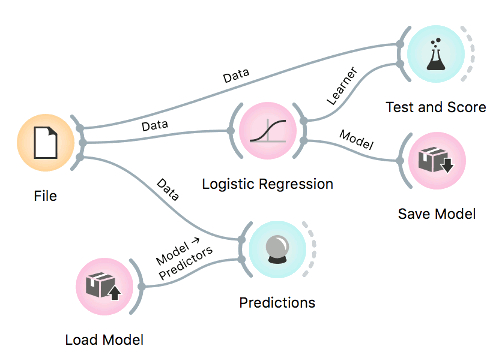